<a href="https://colab.research.google.com/github/thelonesaiyan/Machine_Learning/blob/master/Keras_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KERAS WITH TENSORFLOW

### Import Libraries

In [0]:
import tensorflow as tf

### Load Dataset

In [0]:
mnist = tf.keras.datasets.mnist

### Store values

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(-1,28, 28, 1)
X_test = X_test.reshape(-1,28, 28, 1)

11493376/11490434 [==============================] - 0s 0us/step


### Shape of the train and test data

In [4]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000,)
(10000,)


### Normalize the data 

In [0]:
X_train = X_train / 255
#X_test = X_test / 255

### CNN Layers

In [0]:
inputs = tf.keras.layers.Input(shape = (28, 28, 1))
hidden1 = tf.keras.layers.Conv2D(filters = 128, kernel_size = (4, 4), activation = tf.keras.activations.relu)(inputs)
hidden2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation=tf.keras.activations.relu)(hidden1)
flatten = tf.keras.layers.Flatten()(hidden2)
hidden3 = tf.keras.layers.Dense(64, activation = tf.keras.activations.relu)(flatten)
outputs = tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax)(hidden3)

### Model fit

In [7]:
model = tf.keras.Model(inputs = inputs, outputs = outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 25, 25, 128)       2176      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 64)        73792     
_________________________________________________________________
flatten (Flatten)            (None, 33856)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                2166848   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 2,243,466
Trainable params: 2,243,466
Non-trainable params: 0
___________________________________________________

In [0]:
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ['accuracy'])

In [9]:
history = model.fit(X_train, Y_train, batch_size=10000, epochs=200)

Epoch 1/200
6/6 [==============================] - 2s 403ms/step - loss: 2.3039 - accuracy: 0.1177
Epoch 2/200
6/6 [==============================] - 2s 403ms/step - loss: 2.3025 - accuracy: 0.1241
Epoch 3/200
6/6 [==============================] - 2s 403ms/step - loss: 2.3010 - accuracy: 0.1316
Epoch 4/200
6/6 [==============================] - 2s 404ms/step - loss: 2.2995 - accuracy: 0.1405
Epoch 5/200
6/6 [==============================] - 2s 404ms/step - loss: 2.2980 - accuracy: 0.1497
Epoch 6/200
6/6 [==============================] - 2s 407ms/step - loss: 2.2966 - accuracy: 0.1599
Epoch 7/200
6/6 [==============================] - 2s 405ms/step - loss: 2.2952 - accuracy: 0.1697
Epoch 8/200
6/6 [==============================] - 2s 403ms/step - loss: 2.2937 - accuracy: 0.1806
Epoch 9/200
6/6 [==============================] - 2s 404ms/step - loss: 2.2923 - accuracy: 0.1911
Epoch 10/200
6/6 [==============================] - 2s 401ms/step - loss: 2.2909 - accuracy: 0.2012
Epoch 11/

### Plotting the loss

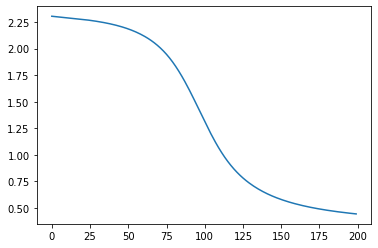

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

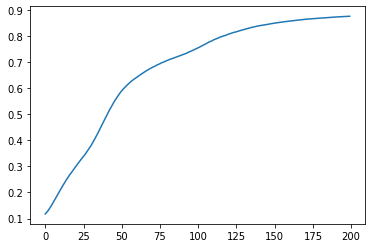

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])